# Machine Learning Assignment

# Decision trees and Random forests

##### Question 1 (a)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
madelon_train_df = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_train.data', delimiter=' ', header=None)
madelon_train_df = madelon_train_df.drop(madelon_train_df.columns[-1], axis=1)
madelon_train_labels_df = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_train.labels', delimiter=' ', header=None)
madelon_test_df = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_valid.data', delimiter=' ', header=None)
madelon_test_df = madelon_test_df.drop(madelon_test_df.columns[-1], axis=1)
madelon_test_labels_df = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_valid.labels', delimiter=' ', header=None)


In [3]:
madelon_train_labels_df

,0
0,-1
1,-1
2,-1
3,1
4,1
...,...
1995,1
1996,-1
1997,-1
1998,1


In [3]:
tree_depth= range(1,13)
train_errors = []
test_errors = []

In [4]:
for depth in tree_depth:
 
    Dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    Dt_clf.fit(madelon_train_df, madelon_train_labels_df)

    madelon_train_pred = Dt_clf.predict(madelon_train_df)
    
    madelon_test_pred = Dt_clf.predict(madelon_test_df)

    misclassification_train_errors = 1 - accuracy_score(madelon_train_labels_df, madelon_train_pred)
    misclassification_test_errors  = 1 - accuracy_score(madelon_test_labels_df, madelon_test_pred)
    
    train_errors.append(misclassification_train_errors)
    test_errors.append(misclassification_test_errors)

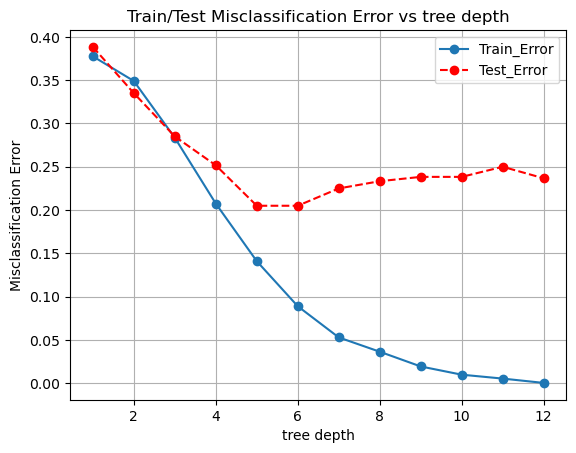

In [5]:
plt.plot(tree_depth, train_errors, label='Train_Error', marker='o')
plt.plot(tree_depth, test_errors, label='Test_Error', marker='o',color='red',linestyle='--')
plt.xlabel('tree depth')
plt.ylabel('Misclassification Error')
plt.title('Train/Test Misclassification Error vs tree depth')
plt.grid()
plt.legend()
plt.show()

In [6]:
minimum_test_error = min(test_errors)
minimum_test_depth = tree_depth[test_errors.index(minimum_test_error)]

In [7]:
tbl_1a = {
    'minimum_test_error': minimum_test_error ,
    'minimum_test_depth': minimum_test_depth,
}

tbl_1a_df = pd.DataFrame(tbl_1a, index=[0])
print(tbl_1a_df)

   minimum_test_error  minimum_test_depth
0               0.205                   5


#### Question 1 (b)

In [8]:
satimage_X = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/satimage/X.dat', delimiter=' ', header=None)
satimage_Y = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/satimage/Y.dat', delimiter=' ', header=None)
satimage_X_test = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/satimage/Xtest.dat', delimiter=' ', header=None)
satimage_Y_test = pd.read_table('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/satimage/Ytest.dat', delimiter=' ', header=None)


In [9]:
tree_depth= range(1,13)
sat_train_errors = []
sat_test_errors = []

In [10]:
for depth in tree_depth:
 
    sat_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)

    sat_clf.fit(satimage_X, satimage_Y)

    satimage_train_pred = sat_clf.predict(satimage_X)
    
    satimage_test_pred = sat_clf.predict(satimage_X_test)

    misclassification_sat_train_errors = 1 - accuracy_score(satimage_Y, satimage_train_pred)
    misclassification_sat_test_errors  = 1 - accuracy_score(satimage_Y_test, satimage_test_pred)
    
    sat_train_errors.append(misclassification_sat_train_errors)
    sat_test_errors.append(misclassification_sat_test_errors)

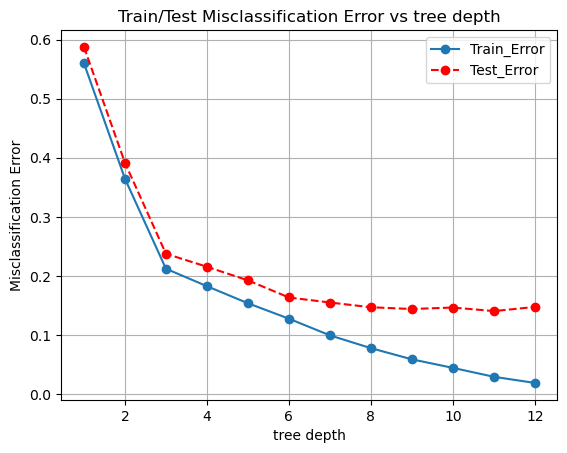

In [11]:
plt.plot(tree_depth, sat_train_errors, label='Train_Error', marker='o')
plt.plot(tree_depth, sat_test_errors, label='Test_Error', marker='o',color='red',linestyle='--')
plt.xlabel('tree depth')
plt.ylabel('Misclassification Error')
plt.title('Train/Test Misclassification Error vs tree depth')
plt.grid()
plt.legend()
plt.show()

In [12]:
minimum_sat_test_error= min(sat_test_errors)
minimum_sat_test_depth = tree_depth[sat_test_errors.index(minimum_sat_test_error)]

In [13]:
tbl_1b = {
    'minimum_test_error': minimum_sat_test_error ,
    'minimum_test_depth': minimum_sat_test_depth,
}

tbl_1b_df = pd.DataFrame(tbl_1b, index=[0])
print(tbl_1b_df)

   minimum_test_error  minimum_test_depth
0              0.1405                  11


#### Question 1 (c)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_madelon_train = np.loadtxt('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_train.data')
rf_madelon_train_labels = np.loadtxt('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_train.labels')
rf_madelon_test = np.loadtxt('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_valid.data')
rf_madelon_test_labels = np.loadtxt('/Users/gaganullas19/Documents/Spring2024/AppliedMachineLearning/Homework_1/MADELON/madelon_valid.labels')


In [16]:
rf_tree_nos= [3, 10, 30, 100, 300]
rf_train_errors = []
rf_test_errors = []

In [17]:
for trees in rf_tree_nos:
 
    Rf_clf = RandomForestClassifier(n_estimators=trees, max_features=int(np.sqrt(500)), random_state=0)

    Rf_clf.fit(rf_madelon_train, rf_madelon_train_labels)

    rf_madelon_train_pred = Rf_clf.predict(rf_madelon_train)
    
    rf_madelon_test_pred = Rf_clf.predict(rf_madelon_test)

    rf_miscls_train_errors = 1 - accuracy_score(rf_madelon_train_labels, rf_madelon_train_pred)
    rf_miscls_test_errors  = 1 - accuracy_score(rf_madelon_test_labels, rf_madelon_test_pred)
    
    rf_train_errors.append(rf_miscls_train_errors)
    rf_test_errors.append(rf_miscls_test_errors)

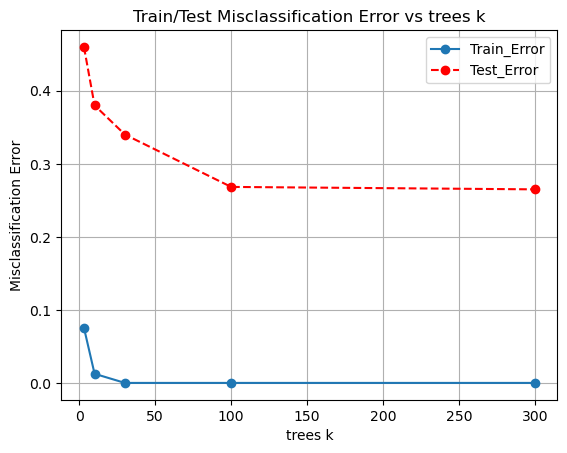

In [18]:
plt.plot(rf_tree_nos, rf_train_errors, label='Train_Error', marker='o')
plt.plot(rf_tree_nos, rf_test_errors, label='Test_Error', marker='o',color='red',linestyle='--')
plt.xlabel('trees k')
plt.ylabel('Misclassification Error')
plt.title('Train/Test Misclassification Error vs trees k')
plt.grid()
plt.legend()
plt.show()

In [19]:
tbl_1c = {
    'Trees (k)': rf_tree_nos ,
    'Train Misclassification Error': rf_train_errors,
    'Test Misclassification Error': rf_test_errors
}
df = pd.DataFrame(tbl_1c)
print(df)

   Trees (k)  Train Misclassification Error  Test Misclassification Error
0          3                         0.0755                      0.460000
1         10                         0.0125                      0.380000
2         30                         0.0000                      0.340000
3        100                         0.0000                      0.268333
4        300                         0.0000                      0.265000


#### Question 1 (d)

In [20]:
rf_tree_nos= [3, 10, 30, 100, 300]
train_errors = []
test_errors = []

In [21]:
for trees in rf_tree_nos:
 
    Rf_clf = RandomForestClassifier(n_estimators=trees, max_features=int(np.log(500)), random_state=0)

    Rf_clf.fit(rf_madelon_train, rf_madelon_train_labels)

    rf_madelon_train_pred = Rf_clf.predict(rf_madelon_train)
    
    rf_madelon_test_pred = Rf_clf.predict(rf_madelon_test)

    rf_train_errors = 1 - accuracy_score(rf_madelon_train_labels, rf_madelon_train_pred)
    rf_test_errors  = 1 - accuracy_score(rf_madelon_test_labels, rf_madelon_test_pred)
    
    train_errors.append(rf_train_errors)
    test_errors.append(rf_test_errors)

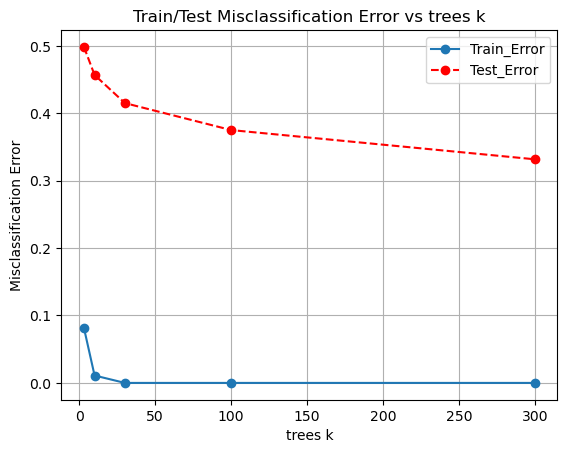

In [22]:
plt.plot(rf_tree_nos, train_errors, label='Train_Error', marker='o')
plt.plot(rf_tree_nos, test_errors, label='Test_Error', marker='o',color='red',linestyle='--')
plt.xlabel('trees k')
plt.ylabel('Misclassification Error')
plt.title('Train/Test Misclassification Error vs trees k')
plt.grid()
plt.legend()
plt.show()

In [23]:
tbl_1d = {
    'Trees (k)': rf_tree_nos ,
    'Train Misclassification Error': train_errors,
    'Test Misclassification Error': test_errors
}
df = pd.DataFrame(tbl_1d)
print(df)

   Trees (k)  Train Misclassification Error  Test Misclassification Error
0          3                         0.0815                      0.498333
1         10                         0.0110                      0.456667
2         30                         0.0000                      0.415000
3        100                         0.0000                      0.375000
4        300                         0.0000                      0.331667


#### Question 1 (e)

In [24]:
rf_tree_nos= [3, 10, 30, 100, 300]
train_errors = []
test_errors = []

In [25]:
for trees in rf_tree_nos:
 
    Rf_clf = RandomForestClassifier(n_estimators=trees, max_features=int(500), random_state=0)

    Rf_clf.fit(rf_madelon_train, rf_madelon_train_labels)

    rf_madelon_train_pred = Rf_clf.predict(rf_madelon_train)
    
    rf_madelon_test_pred = Rf_clf.predict(rf_madelon_test)

    rf_train_errors = 1 - accuracy_score(rf_madelon_train_labels, rf_madelon_train_pred)
    rf_test_errors  = 1 - accuracy_score(rf_madelon_test_labels, rf_madelon_test_pred)
    
    train_errors.append(rf_train_errors)
    test_errors.append(rf_test_errors)

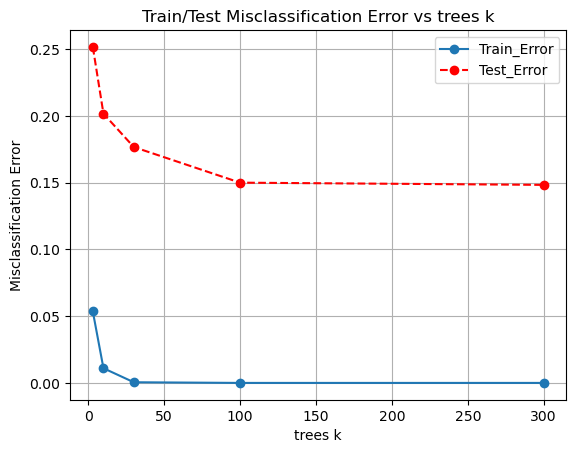

In [26]:
plt.plot(rf_tree_nos, train_errors, label='Train_Error', marker='o')
plt.plot(rf_tree_nos, test_errors, label='Test_Error', marker='o',color='red',linestyle='--')
plt.xlabel('trees k')
plt.ylabel('Misclassification Error')
plt.title('Train/Test Misclassification Error vs trees k')
plt.grid()
plt.legend()
plt.show()

In [27]:
tbl_1e = {
    'Trees (k)': rf_tree_nos ,
    'Train Misclassification Error': train_errors,
    'Test Misclassification Error': test_errors
}
df = pd.DataFrame(tbl_1e)
print(df)

   Trees (k)  Train Misclassification Error  Test Misclassification Error
0          3                         0.0535                      0.251667
1         10                         0.0110                      0.201667
2         30                         0.0005                      0.176667
3        100                         0.0000                      0.150000
4        300                         0.0000                      0.148333
